# ***1. Import Necessary Libraries***

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ***Laoding The data and Data Preprocessing***

In [29]:

# Load the real data (replace with your actual CSV file path)
data = pd.read_csv('/content/merged_data.csv')

# Display the first few rows of the data to understand its structure
print(data.head())

              ts_event  bid_fill  ask_fill  Signed Volume   price  best_bid  \
0  2024-10-22 08:00:00     801.0    1999.0        -1198.0  236.14    235.83   
1  2024-10-22 08:00:01     201.0     202.0           -1.0  236.13    235.83   
2  2024-10-22 08:00:02    1600.0    1400.0          200.0  235.83    235.83   
3  2024-10-22 08:00:03     534.0     400.0          134.0  236.10    235.96   
4  2024-10-22 08:00:04     400.0     502.0         -102.0  236.11    235.96   

   best_ask  mid_price  
0    236.14    235.985  
1    236.13    235.980  
2    236.11    235.970  
3    236.10    236.030  
4    236.11    236.035  


# ***2. Data Preprocessing***
We will clean and preprocess your data:

- Drop timestamp (ts_event) as it's not needed for model training.
- Handle missing values if any.
- Create features using columns such as Signed Volume, Bid Fill, Ask - Fill, Best Bid, Best Ask, and Price.
Scale the features to ensure better neural network training.


In [30]:
# Drop timestamp column as it is not needed for model training
data = data.drop(columns=['ts_event'])

# Check for missing values and handle them (e.g., drop or impute)
print("Missing values:", data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Define features and target variable
features = ['bid_fill', 'ask_fill', 'Signed Volume', 'price', 'best_bid', 'best_ask', 'mid_price']
X = data[features]

# For simplicity, we will define 'adjusted_return' as price - best_bid (can be modified based on your requirements)
data['adjusted_return'] = data['price'] - data['best_bid']
y = data['adjusted_return']



Missing values: bid_fill         0
ask_fill         0
Signed Volume    0
price            0
best_bid         0
best_ask         0
mid_price        0
dtype: int64


# ***Train Test Split***

In [31]:

# Scale features using StandardScaler (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ***Build the Neural Network Model***

we define the feed-forward neural network (fully connected layers). The model will predict the adjusted return.
- The input layer takes the scaled features (in this case, 7 **features**: bid_fill, ask_fill, Signed Volume, price, best_bid, best_ask, mid_price).
- We use ReLU activation for the hidden layers to introduce non-linearity.
- The output layer is a single neuron with no activation function (since it's a regression task).
- Adam optimizer and mean squared error (MSE) are used for optimization and loss calculation.


In [32]:
# Define the basic neural network model
def create_basic_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # First hidden layer with 64 neurons
    model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
    model.add(Dense(1))  # Output layer (1 unit, no activation for regression)

    model.compile(optimizer='adam', loss='mean_squared_error')  # Using Adam optimizer and MSE loss
    return model

# Create the basic model
model = create_basic_model(X_train.shape[1])

# Print model summary
model.summary()





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

# ***Train the Model***

train the model using the training set and validate it on the validation set. We’ll also track the training loss and validation loss.

In [33]:
# Train the model with verbose=1 to show progress
history_basic = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0077 - val_loss: 0.0054
Epoch 2/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0213 - val_loss: 0.0010
Epoch 3/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0093 - val_loss: 0.0014
Epoch 4/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0373 - val_loss: 0.0013
Epoch 5/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070 - val_loss: 0.0129
Epoch 6/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0069 - val_loss: 0.0333
Epoch 7/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1188 - val_loss: 0.0013
Epoch 8/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 9/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0017 - val_loss: 6.9430e-04
Epoch 10/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0077 - val_loss: 0.0015
Epoch 11/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0505 - val_loss: 0.0026
Epoch 12/100
693/693 ━━━━━━━━━━━━━━━━

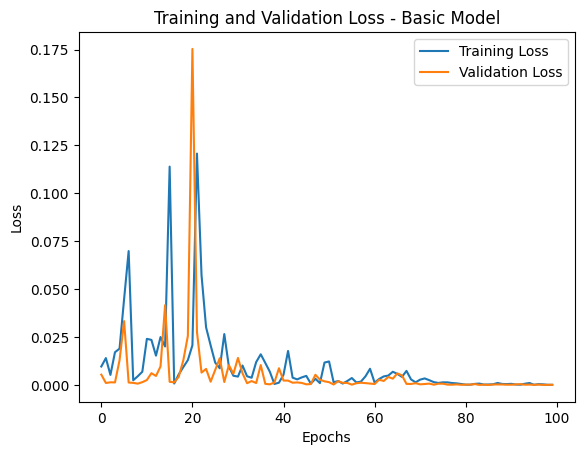

In [34]:
# Plot training & validation loss for the basic model
plt.plot(history_basic.history['loss'], label='Training Loss')
plt.plot(history_basic.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Basic Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model
y_pred_basic = model.predict(X_val)
mse_basic = mean_squared_error(y_val, y_pred_basic)
r2_basic = r2_score(y_val, y_pred_basic)
mae_basic = mean_absolute_error(y_val, y_pred_basic)

# Print performance metrics
print(f"Basic Model - MSE: {mse_basic:.4f}, R-squared: {r2_basic:.4f}, MAE: {mae_basic:.4f}")

174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Basic Model - MSE: 0.0001, R-squared: 0.9891, MAE: 0.0015


# ***. Overfitting Detection and Regularization***

To prevent overfitting, we can add dropout layers, which will randomly set some neuron activations to 0 during training. This helps the model generalize better by preventing it from becoming too reliant on specific neurons. Dropout Layer: The Dropout(0.5) layers are added after the hidden layers, meaning 50% of neurons will be randomly dropped during training, which helps with regularization.
Training and Validation Loss: By monitoring the loss curves, we can check if Dropout helps prevent overfitting.


In [21]:
from tensorflow.keras.layers import Dropout

# Define the model with Dropout for regularization
def create_model_with_dropout(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # First hidden layer with 64 neurons
    model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
    model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
    model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
    model.add(Dense(1))  # Output layer (1 unit, no activation for regression)

    model.compile(optimizer='adam', loss='mean_squared_error')  # Using Adam optimizer and MSE loss
    return model

# Create the model with Dropout
model_dropout = create_model_with_dropout(X_train.shape[1])

# Print model summary
model_dropout.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:

# Train the model with verbose=1 to show progress
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0793 - val_loss: 0.0074
Epoch 2/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0111 - val_loss: 0.0072
Epoch 3/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 4/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - val_loss: 0.0053
Epoch 5/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0404 - val_loss: 0.0045
Epoch 6/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0292 - val_loss: 0.0039
Epoch 7/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0118 - val_loss: 0.0035
Epoch 8/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070 - val_loss: 0.0032
Epoch 9/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0067 - val_loss: 0.0027
Epoch 10/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0207 - val_loss: 0.0031
Epoch 11/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 12/100
693/693 ━━━━━━━━━━━━━━━━━━━━

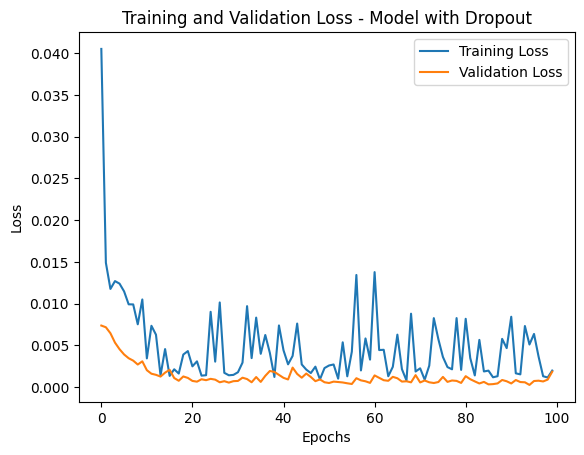

In [23]:
# Plot training & validation loss for the model with Dropout
plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Model with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
#Evaluate the model
y_pred_dropout = model_dropout.predict(X_val)
mse_dropout = mean_squared_error(y_val, y_pred_dropout)
r2_dropout = r2_score(y_val, y_pred_dropout)
mae_dropout = mean_absolute_error(y_val, y_pred_dropout)

# Print performance metrics
print(f"Model with Dropout - MSE: {mse_dropout:.4f}, R-squared: {r2_dropout:.4f}, MAE: {mae_dropout:.4f}")

174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model with Dropout - MSE: 0.0018, R-squared: 0.7499, MAE: 0.0097


# ***Modified Model with L2 Regularization***

L2 regularization adds a penalty to the model's weights, preventing the model from fitting noise in the data.

In [24]:
from tensorflow.keras.regularizers import l2

# Define the model with L2 regularization
def create_model_with_l2(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
    model.add(Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')  # Using Adam optimizer and MSE loss
    return model

# Create the model with L2 regularization
model_l2 = create_model_with_l2(X_train.shape[1])

# Print model summary
model_l2.summary()

# Train the model with verbose=1 to show progress
history_l2 = model_l2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2376 - val_loss: 0.0104
Epoch 2/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0133 - val_loss: 0.0074
Epoch 3/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0197 - val_loss: 0.0073
Epoch 4/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0099 - val_loss: 0.0073
Epoch 5/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0130 - val_loss: 0.0073
Epoch 6/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0133 - val_loss: 0.0073
Epoch 7/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0213 - val_loss: 0.0073
Epoch 8/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 9/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0051 - val_loss: 0.0077
Epoch 10/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0091 - val_loss: 0.0073
Epoch 11/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054 - val_loss: 0.0075
Epoch 12/100
693/693 ━━━━━━━━━━━━━━━━━━━━

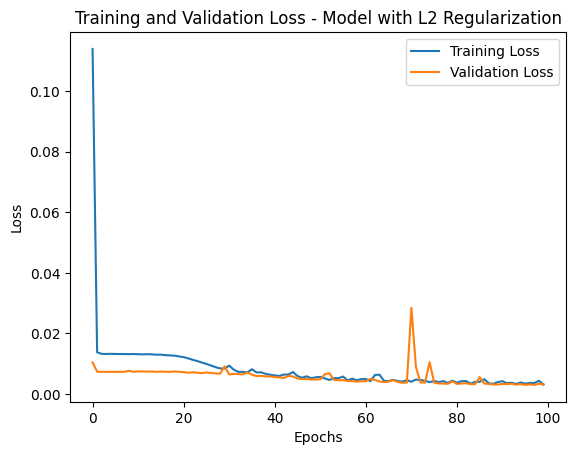

In [25]:

# Plot training & validation loss for the model with L2 regularization
plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Model with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
# Evaluate the model
y_pred_l2 = model_l2.predict(X_val)
mse_l2 = mean_squared_error(y_val, y_pred_l2)
r2_l2 = r2_score(y_val, y_pred_l2)
mae_l2 = mean_absolute_error(y_val, y_pred_l2)

# Print performance metrics
print(f"Model with L2 Regularization - MSE: {mse_l2:.4f}, R-squared: {r2_l2:.4f}, MAE: {mae_l2:.4f}")










174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model with L2 Regularization - MSE: 0.0005, R-squared: 0.9386, MAE: 0.0119


# ***Experimenting with a Lower Learning Rate***

In [26]:
from tensorflow.keras.optimizers import Adam

# Create the model with a smaller learning rate
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate

model_lr = create_model(X_train.shape[1])
model_lr.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with verbose=1 to show progress
history_lr = model_lr.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0225 - val_loss: 0.0059
Epoch 2/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0091 - val_loss: 0.0045
Epoch 3/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 4/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0255 - val_loss: 0.0031
Epoch 5/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0069 - val_loss: 0.0027
Epoch 6/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0179 - val_loss: 0.0023
Epoch 7/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 8/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0213 - val_loss: 0.0017
Epoch 9/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 10/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0073 - val_loss: 0.0017
Epoch 11/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0058 - val_loss: 0.0012
Epoch 12/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

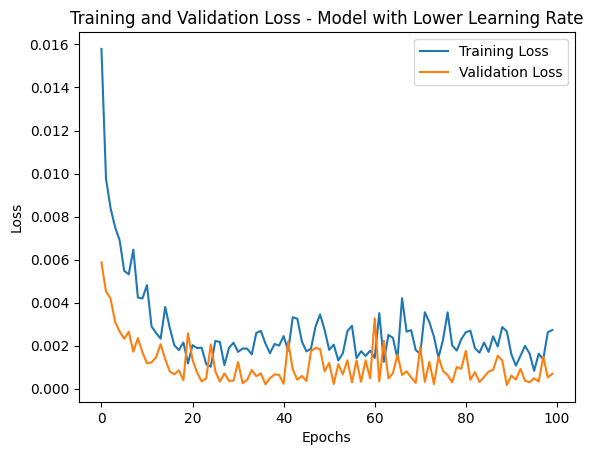

In [27]:

# Plot training & validation loss for the model with lower learning rate
plt.plot(history_lr.history['loss'], label='Training Loss')
plt.plot(history_lr.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Model with Lower Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [40]:

# Evaluate the model
y_pred_lr = model_lr.predict(X_val)
mse_lr = mean_squared_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)
mae_lr = mean_absolute_error(y_val, y_pred_lr)

# Print performance metrics
print(f"Model with Lower Learning Rate - MSE: {mse_lr:.4f}, R-squared: {r2_lr:.4f}, MAE: {mae_lr:.4f}")

174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model with Lower Learning Rate - MSE: 0.0007, R-squared: 0.9061, MAE: 0.0062


In [41]:
# Create a comparison table for all models
comparison_df = pd.DataFrame({
    'Model': ['Basic Model', 'Model with Dropout', 'Model with L2 Regularization', 'Model with Lower Learning Rate'],
    'MSE': [mse_basic, mse_dropout, mse_l2, mse_lr],
    'R-squared': [r2_basic, r2_dropout, r2_l2, r2_lr],
    'MAE': [mae_basic, mae_dropout, mae_l2, mae_lr]
})

# Display the comparison table
print(comparison_df)


                            Model       MSE  R-squared       MAE
0                     Basic Model  0.000080   0.989122  0.001543
1              Model with Dropout  0.001837   0.749877  0.009698
2    Model with L2 Regularization  0.000451   0.938553  0.011894
3  Model with Lower Learning Rate  0.000690   0.906106  0.006180


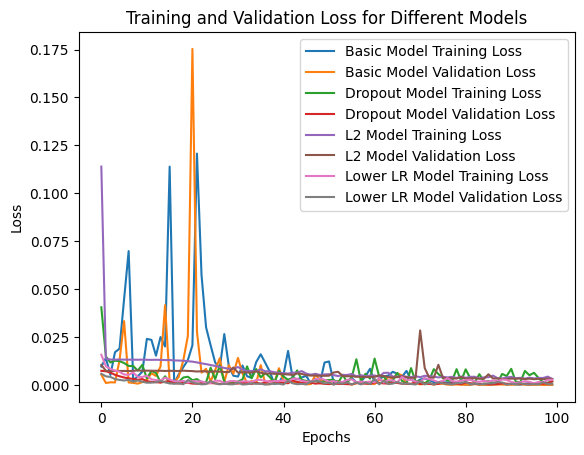

In [42]:
# Plot training & validation loss for each model

# Basic Model Loss
plt.plot(history_basic.history['loss'], label='Basic Model Training Loss')
plt.plot(history_basic.history['val_loss'], label='Basic Model Validation Loss')

# Model with Dropout Loss
plt.plot(history_dropout.history['loss'], label='Dropout Model Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Dropout Model Validation Loss')

# Model with L2 Regularization Loss
plt.plot(history_l2.history['loss'], label='L2 Model Training Loss')
plt.plot(history_l2.history['val_loss'], label='L2 Model Validation Loss')

# Model with Lower Learning Rate Loss
plt.plot(history_lr.history['loss'], label='Lower LR Model Training Loss')
plt.plot(history_lr.history['val_loss'], label='Lower LR Model Validation Loss')

# Plot customization
plt.title('Training and Validation Loss for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
